## 1. Loading Data, Renaming Columns and Converting dtypes

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/tec03/Datasets/main/datasets/groceries101.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21/07/15,tropical fruit
1,2552,05/01/15,whole milk
2,2300,19/09/15,pip fruit
3,1187,12/12/15,other vegetables
4,3037,01/02/15,whole milk


In [9]:
#check for any NaN cells
df.isnull().values.any()

False

In [10]:
#shorten the column titles 
df.rename({"Member_number": "id", 
           "Date": "date", 
           "itemDescription": "item"
           }, 
          axis=1, 
          inplace=True
          )
df.head()

,id,date,item
0,1808,21/07/15,tropical fruit
1,2552,05/01/15,whole milk
2,2300,19/09/15,pip fruit
3,1187,12/12/15,other vegetables
4,3037,01/02/15,whole milk


View datatypes using df.dtypes and date is object type

Convert data types appropriately
  * e.g date into datetime
  * items and id into strings
  * add one column of month and date

In [11]:
print(df.date.dtypes)
df["date"] = pd.to_datetime(df["date"])
print(df.date.dtypes)
df.head()

object
datetime64[ns]


,id,date,item
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [16]:
print(type(df['id'][1]))
df["item"] = df["item"].astype("str")
df["id"] = df["id"].astype("str")
print(type(df['id'][1]))
df.head()

<class 'numpy.int64'>
<class 'str'>


,id,date,item
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [19]:
print(type(df['date'][1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df["year_month"] = pd.to_datetime(df["date"].dt.strftime('%Y-%m-%d'))

df.sort_values("date", 
               inplace = True
               )
df.head(50)

## 2. Overview of Total Sales Per Month

1. There are a total of **167 unique items** and **3898 unique customers**. 
2. The data is collected over a period of two years
   * From **1st Jan 2014** to **30th Dec 2015**. 
   
Lets look at the total number of sales per month for 2014 and 2015 respectively and compare both years to identify if there are any similar seasonal trends.

### How many items are there?

In [25]:
items = df.item.nunique()
items

167

### How many customers?

In [26]:
customers = df.id.nunique()
customers

3898

### Time period where data is collected

In [27]:
max_date = df.date.max()
min_date = df.date.min()

In [28]:
print('Collected 2 years of data, from {} and {}'.format(min_date, max_date))

Collected 2 years of data, from 2014-01-01 00:00:00 and 2015-12-30 00:00:00


Count total number of items bought per month:

In [63]:
df_sales = df.year_month.value_counts().rename_axis("year_month").reset_index(name = "sales")
df_sales

,year_month,sales
0,2015-01-21,96
1,2015-07-21,93
2,2015-11-29,92
3,2015-08-08,92
4,2015-04-30,91
...,...,...
723,2014-10-01,26
724,2014-04-07,24
725,2015-03-17,23
726,2015-03-16,23


Rename axis and sort by date: 

In [64]:
df_sales_year = df_sales
df_sales_year["year"] = pd.DatetimeIndex(df_sales_year['year_month']).year
df_sales_year["month"] = pd.DatetimeIndex(df_sales_year['year_month']).strftime('%b')

df_sales_year.sort_values("year_month", inplace = True)
df_sales_year

,year_month,sales,year,month
446,2014-01-01,48,2014,Jan
181,2014-01-02,62,2014,Jan
330,2014-01-03,54,2014,Jan
144,2014-01-04,64,2014,Jan
556,2014-01-05,44,2014,Jan
...,...,...,...,...
653,2015-12-26,37,2015,Dec
47,2015-12-27,74,2015,Dec
247,2015-12-28,58,2015,Dec
270,2015-12-29,57,2015,Dec


Separate into different years:

In [65]:
df_sales_year_2014 = df_sales_year.loc[df_sales_year.year == 2014]
df_sales_year_2015 = df_sales_year.loc[df_sales_year.year == 2015]

Left join/ merge two dataframe for graph plotting 

In [66]:
df_sales_year_all = pd.merge(df_sales_year_2014, 
                             df_sales_year_2015, 
                             on=["month"]
                             )

df_sales_year_all.head()

,year_month_x,sales_x,year_x,month,year_month_y,sales_y,year_y
0,2014-01-01,48,2014,Jan,2015-01-01,48,2015
1,2014-01-01,48,2014,Jan,2015-01-02,61,2015
2,2014-01-01,48,2014,Jan,2015-01-03,76,2015
3,2014-01-01,48,2014,Jan,2015-01-04,83,2015
4,2014-01-01,48,2014,Jan,2015-01-05,68,2015


The **total sales in 2015** (blue) is **higher** than **total sales in 2014** (red). However, there are no distinct seasonality or monthly trends, with both years having different month with highest and lowest total sales:

1. Highest Monthly Sales:
    - 2015: Aug 
    - 2014: No distinct month, but May and Jul has similar total sales 
2. Lowest Monthly Sales:
    - 2015: Feb *(important to note that sales for this month is lower than Feb 2014)*
    - 2014: Sep
    
2014 has a rather **steady total sales throughout the yea**r, except for the month of Sep. 
2015 instead **fluctuates more**, with more distinct difference in total sales as compared to previous months. 

Perhaps we can look at total sales for days in a week to identify most busy and least busy days. 


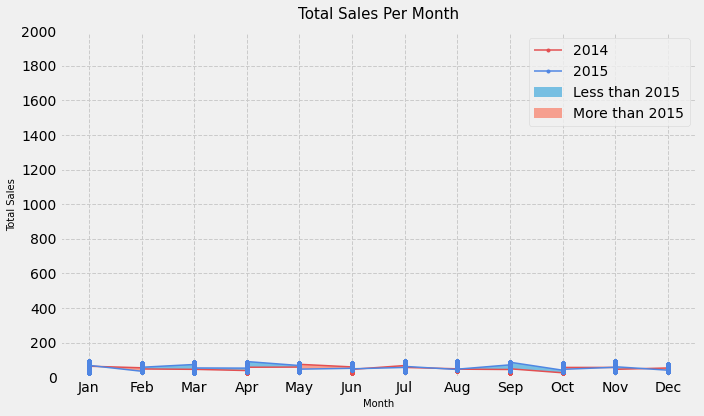

In [68]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (10,6))

plt.plot(df_sales_year_all.month, 
         df_sales_year_all.sales_x, 
         linewidth = 1.5, 
         label = "2014", 
         marker = ".", 
         color = "#e34f51"
         )

plt.plot(df_sales_year_all.month, 
         df_sales_year_all.sales_y, 
         linewidth = 1.5, 
         label = "2015", 
         marker = ".", 
         color = "#4f86e3"
         )

plt.fill_between(df_sales_year_all.month, 
                 df_sales_year_all.sales_x, 
                 df_sales_year_all.sales_y,
                where = (df_sales_year_all.sales_x < df_sales_year_all.sales_y),
                interpolate = True, 
                 label = "Less than 2015", 
                 alpha = 0.5
                 )

plt.fill_between(df_sales_year_all.month, 
                 df_sales_year_all.sales_x, 
                 df_sales_year_all.sales_y,
                where = (df_sales_year_all.sales_x > df_sales_year_all.sales_y),
                interpolate = True, 
                 label = "More than 2015", 
                 alpha = 0.5
                 ) 

plt.xlabel("Month", size = 10)
plt.ylabel("Total Sales", size = 10)

plt.yticks(np.arange(0,2200,200).tolist())

plt.title("Total Sales Per Month", size = 15, pad = 12)

plt.legend()
plt.grid(linestyle='dashed')
plt.tight_layout()
plt.show()


## 3. Overview of Total Sales by Day of Week
As we are **unable to identify any distinct seasonal monthly trends**, lets instead investigate the **total sales per day in a week** to identify the most busy and least busy days.

Create column for year and day of week

In [69]:
df_sales_week = df
df_sales_week["day_of_week"] = pd.DatetimeIndex(df["date"]).strftime("%w")
df_sales_week["year"] = pd.DatetimeIndex(df_sales_week["date"]).year
df_sales_week

,id,date,item,year_month,day_of_week,year
15338,1381,2014-01-01,curd,2014-01-01,3,2014
38643,2974,2014-01-01,bottled water,2014-01-01,3,2014
10044,2943,2014-01-01,whole milk,2014-01-01,3,2014
25706,1922,2014-01-01,other vegetables,2014-01-01,3,2014
14419,3797,2014-01-01,waffles,2014-01-01,3,2014
...,...,...,...,...,...,...
2168,2997,2015-12-30,citrus fruit,2015-12-30,3,2015
17955,1963,2015-12-30,citrus fruit,2015-12-30,3,2015
1628,4058,2015-12-30,domestic eggs,2015-12-30,3,2015
17777,4058,2015-12-30,cream cheese,2015-12-30,3,2015


Group by day of week and count number of sales:

In [70]:
df_sales_week = df_sales_week.groupby("day_of_week")["year"].value_counts().reset_index(name = "sales")
df_sales_week.head()

,day_of_week,year,sales
0,0,2015,3000
1,0,2014,2624
2,1,2015,2751
3,1,2014,2548
4,2,2015,2930


Separate into year 2014 and 2015:

In [71]:
df_sales_week_2014 = df_sales_week.loc[df_sales_week["year"] == 2014]
df_sales_week_2015 = df_sales_week.loc[df_sales_week["year"] == 2015]

Left join two dataframes on day_of_week

In [72]:
df_sales_week_all = pd.merge(df_sales_week_2014, df_sales_week_2015, on = ["day_of_week"])
df_sales_week_all.head(7)

,day_of_week,year_x,sales_x,year_y,sales_y
0,0,2014,2624,2015,3000
1,1,2014,2548,2015,2751
2,2,2014,2594,2015,2930
3,3,2014,2532,2015,3131
4,4,2014,2798,2015,2956
5,5,2014,2621,2015,2883
6,6,2014,2560,2015,2837


The results are rather surprising because we would **expect total sales for Sat and Sun to be the highest** as customers usually stock up on groceries on the weekends. Instead, the time series visualisation reveals the following:

1. Most Busy Day:
    - 2015: Wednesday 
    - 2014: Thursday
2. Least Busy Day:
    - 2015: Monday 
    - 2014: Wednesday *(however, sales throughout the week are relatively steady, except for the most busy day)*
    
Was this the result of **successful discount campaigns** that were carried out on Wed 2015 and Thur 2014? There has been cases where discounts were given to customers who shop on least busy days, in order to boost total sales. Such campaigns could have potentially be carried out by the supermarket on Wed 2015, after observing that Wed 2014 day was the least profitable day. 

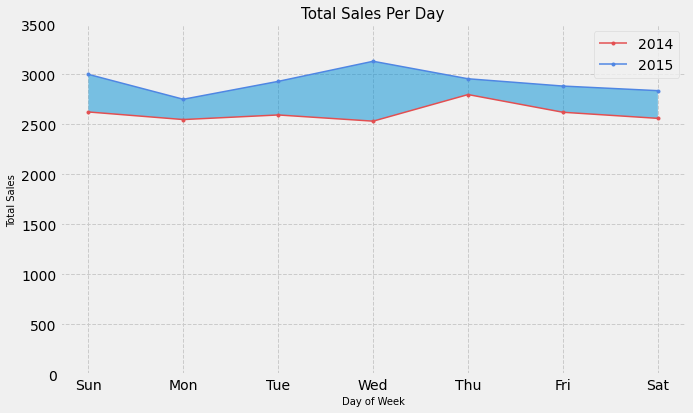

In [74]:
plt.figure(figsize = (10,6))

plt.plot(df_sales_week_all.day_of_week, 
         df_sales_week_all.sales_x, 
         label = "2014", 
         linewidth = 1.5, 
         marker = ".", 
         color = "#e34f51"
         )

plt.plot(df_sales_week_all.day_of_week, 
         df_sales_week_all.sales_y, 
         label = "2015", 
         linewidth = 1.5, 
         marker = ".", 
         color = "#4f86e3"
         )

plt.fill_between(df_sales_week_all.day_of_week, 
                 df_sales_week_all.sales_x, 
                 df_sales_week_all.sales_y,
                where = (df_sales_week_all.sales_x < df_sales_week_all.sales_y),
                interpolate = True, 
                 alpha = 0.5
                 )

day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
day_number = np.arange(0,7,1).tolist()

plt.xticks(ticks = day_number, labels = day)

plt.yticks(np.arange(0,4000,500).tolist())

plt.grid(ls='dashed')

plt.xlabel("Day of Week", size = 10)
plt.ylabel("Total Sales", size = 10)

plt.title("Total Sales Per Day", size = 15)
plt.legend()

plt.show()

We can see that monday total sales has been low for both years  both years have different days of highest sales, and both are in the middle of the week  we expected sunday or saturday to have highest, but this is not the case, although sun is the 2nd highest for both years

## 4. Most Bought Items 2014 and 2015
To boost overall total sales, we can look at the **changes in customer's preference** and or **top 10 items per year**. We predict that some of the item in 2014 top 10 list would not be in 2015 top list. Those that remain in the top few rank (e.g. rank 1 -3) can be assumed to be consumer's main staple or diet. 

Group by year and items and calculate total sales

In [76]:
df_items = df.groupby("year")["item"].value_counts().reset_index(name = "sales")
df_items.head()

,year,item,sales
0,2014,whole milk,1038
1,2014,other vegetables,859
2,2014,rolls/buns,837
3,2014,soda,777
4,2014,yogurt,640


Select top 10 items for each year 

In [77]:
df_item_top10 = df_items.groupby("year").head(10)

Separate into two tables, for 2014 and 2015

In [78]:
df_item_top10_2014 = df_item_top10.loc[df_item_top10.year == 2014].sort_values("sales", ascending = False)
df_item_top10_2015 = df_item_top10.loc[df_item_top10.year == 2015].sort_values("sales", ascending = False)

print(df_item_top10_2014)
print(df_item_top10_2015)

   year                item  sales
0  2014          whole milk   1038
1  2014    other vegetables    859
2  2014          rolls/buns    837
3  2014                soda    777
4  2014              yogurt    640
5  2014       bottled water    504
6  2014     root vegetables    479
7  2014       shopping bags    440
8  2014              pastry    405
9  2014  whipped/sour cream    365
     year              item  sales
167  2015        whole milk   1464
168  2015  other vegetables   1039
169  2015        rolls/buns    879
170  2015           sausage    744
171  2015              soda    737
172  2015            yogurt    694
173  2015    tropical fruit    668
174  2015   root vegetables    592
175  2015      citrus fruit    544
176  2015       frankfurter    505


* Whole milk, other vegetables and roll/s buns remains at the top 3 most purchased item for both years. 
* Items that have **lowered ranks** are bottled water, shopping bags, pastry and whipped/ sour cream and are colored in magenta. 
* Items that have **increased ranks** are sausage, tropical fruit, citrus fruit and frankfurter and are colored green. 

However, in order to more informed analysis, we will break it down into **sales per day**, to have an **overall sensing of how much increase and decrease** in sales there are for each item.  

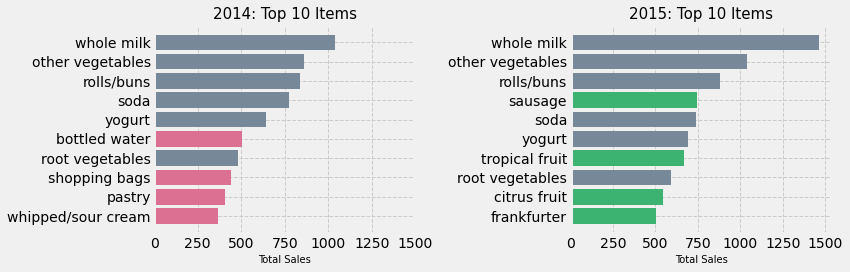

In [79]:
# create boolean list, for colouring of barh plot 
item_list_2015 = df_item_top10_2015.item.isin(df_item_top10_2014.item).tolist()
item_list_2014 = df_item_top10_2014.item.isin(df_item_top10_2015.item).tolist()

plt.style.use("fivethirtyeight")

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

colors_ax1 = []

for item in item_list_2014:
    if item == True:
        colors_ax1.append("lightslategray")
    else:
        colors_ax1.append("palevioletred")

ax1.barh(df_item_top10_2014.item, 
         df_item_top10_2014.sales, 
         color = colors_ax1
         )

ax1.set_xlabel("Total Sales", size = 10)
ax1.set_title("2014: Top 10 Items", size = 15)

ax1.set_xticks(np.arange(0, 1750, 250).tolist())
ax1.invert_yaxis() 
# ax1.yaxis.tick_right()

colors_ax2 = []

for item in item_list_2015:
    if item == True:
        colors_ax2.append("lightslategray")
    else:
        colors_ax2.append("mediumseagreen")
    
ax2.barh(df_item_top10_2015.item, 
         df_item_top10_2015.sales, 
         color = colors_ax2)

ax2.set_xticks(np.arange(0, 1750, 250).tolist())

ax2.set_xlabel("Total Sales", size = 10)
ax2.set_title("2015: Top 10 Items", size = 15)
ax2.invert_yaxis()

ax1.grid(ls='dashed')
ax2.grid(ls='dashed')

plt.tight_layout()
plt.show()

* Bottled water, shopping bags, pastry and whipped/sour cream that were top 10 in 2014 were not i
* Consistently top items are whole milke, other vege, rolls/ buns, soda, yogurt and root vegetables

## 5a. Further Analysis of Constant Top 3 Items
### Top 3: Milk, Vegetables, Roll/ Bun
The sales will be filtered according to top 3 items and compared between 2014 to 2015, to **determine if there is any increasing or decreasing trend**. This is because even though sales are top three, the horizontal bar graph does not shed light on weekly trend of each item *(e.g. an item with most sales could actually be facing a downward sales trend)* Additionally, the total sales per year will be broken down into total sales per day of week. This will help us to identify any trends in the week. 

Inner join to get table of matching items (milk, vege, rolls, sodat etc)

In [80]:
top_6_same = pd.merge(df_item_top10_2014, 
                      df_item_top10_2015, 
                      how = "inner", 
                      left_on = "item", 
                      right_on = "item")
top_6_same.head()

,year_x,item,sales_x,year_y,sales_y
0,2014,whole milk,1038,2015,1464
1,2014,other vegetables,859,2015,1039
2,2014,rolls/buns,837,2015,879
3,2014,soda,777,2015,737
4,2014,yogurt,640,2015,694


Get a list of top 3 item by slicing list: 

In [81]:
top_3_same = top_6_same["item"][0:3].tolist()
top_3_same

['whole milk', 'other vegetables', 'rolls/buns']

Filter data to top 3 item. 
Table used to create sns relplot

In [82]:
top_3_list = df.loc[df.item.isin(top_3_same)]
top_3_list.head()

,id,date,item,year_month,day_of_week,year
10044,2943,2014-01-01,whole milk,2014-01-01,3,2014
25706,1922,2014-01-01,other vegetables,2014-01-01,3,2014
11134,1440,2014-01-01,other vegetables,2014-01-01,3,2014
13242,3942,2014-01-01,other vegetables,2014-01-01,3,2014
30568,3797,2014-01-01,whole milk,2014-01-01,3,2014


Group and count total sales by day of week and item

In [83]:
top_3_list_week = top_3_list.groupby(["year", "day_of_week"])["item"].value_counts().reset_index(name = "sales")
top_3_list_week.head()

,year,day_of_week,item,sales
0,2014,0,whole milk,162
1,2014,0,rolls/buns,124
2,2014,0,other vegetables,116
3,2014,1,whole milk,153
4,2014,1,rolls/buns,123


Filter by year 

Inner join on item and day of week, create table with dataframe suitable for fill_between plot

In [85]:
y2014 =  top_3_list_week.loc[top_3_list_week.year ==2014]
y2015 =  top_3_list_week.loc[top_3_list_week.year ==2015]
y2014_2015 = pd.merge(y2014, 
                      y2015, 
                      how = "inner", 
                      left_on = ["item", "day_of_week"], 
                      right_on = ["item", "day_of_week"]
                      )
y2014_2015.head()

,year_x,day_of_week,item,sales_x,year_y,sales_y
0,2014,0,whole milk,162,2015,216
1,2014,0,rolls/buns,124,2015,112
2,2014,0,other vegetables,116,2015,168
3,2014,1,whole milk,153,2015,196
4,2014,1,rolls/buns,123,2015,113


Filter by each item 

In [86]:
y2014_2015_milk = y2014_2015.loc[y2014_2015.item == "whole milk"]
y2014_2015_vege = y2014_2015.loc[y2014_2015.item == "other vegetables"]
y2014_2015_rb = y2014_2015.loc[y2014_2015.item == "rolls/buns"]

y2014_2015.head()

,year_x,day_of_week,item,sales_x,year_y,sales_y
0,2014,0,whole milk,162,2015,216
1,2014,0,rolls/buns,124,2015,112
2,2014,0,other vegetables,116,2015,168
3,2014,1,whole milk,153,2015,196
4,2014,1,rolls/buns,123,2015,113


Summarised weekly findings:
1. **Whole Milk:**
    - Relatively steady through the weeks, except for peaks
    - Similar peaks and lows for 2014 and 2015 
    - Peaks happen on Wednesdays
    - Lows happen on Friday 
    
2. **Rolls/ Buns:**

    - Peaks happens on Wed and Fri 2015 
    - No obvious peaks in 2014 and sales are rather steady
    
3. **Other Vegetables:**
    - Similar trends for 2014 and 2015 
    - Lows happen on Monday 2014 and 2015

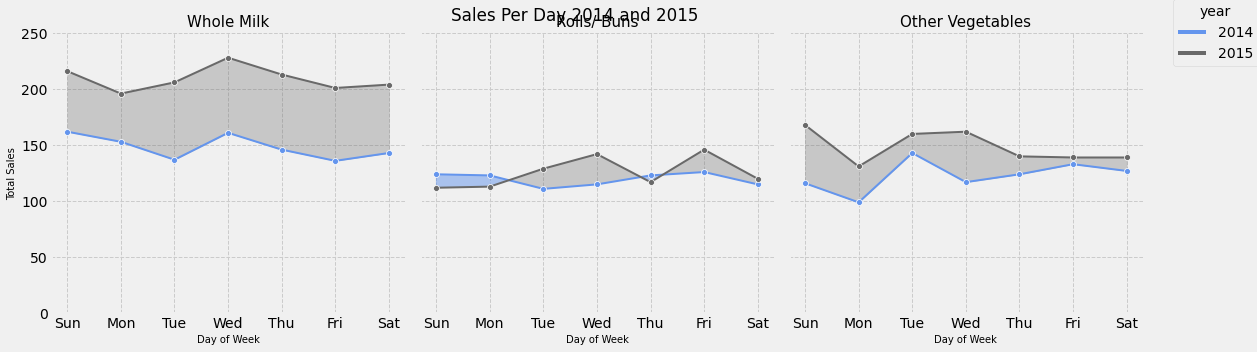

In [88]:
g = sns.relplot(data = top_3_list_week, 
            x = "day_of_week", y = "sales",
           hue = "year",
           col = "item",
           col_wrap = 3,
           kind = "line",
            linewidth = 2,
           marker = "o",
           palette = ["cornflowerblue", "dimgray"])

axes = g.axes.flatten()

#fill between for all axes 
axes[0].fill_between(y2014_2015_milk.day_of_week, 
                     y2014_2015_milk.sales_x, 
                     y2014_2015_milk.sales_y, 
                     alpha = 0.3, 
                     color = "dimgray")

axes[2].fill_between(y2014_2015_vege.day_of_week, 
                     y2014_2015_vege.sales_x, 
                     y2014_2015_vege.sales_y, 
                     alpha = 0.3, 
                     color = "dimgray")

axes[1].fill_between(y2014_2015_rb.day_of_week, 
                     y2014_2015_rb.sales_x, 
                     y2014_2015_rb.sales_y, 
                     where = (y2014_2015_rb.sales_x < y2014_2015_rb.sales_y), 
                     interpolate = True, 
                     alpha = 0.3, 
                     color = "dimgray")

axes[1].fill_between(y2014_2015_rb.day_of_week, 
                     y2014_2015_rb.sales_x, 
                     y2014_2015_rb.sales_y, 
                     where = (y2014_2015_rb.sales_x > y2014_2015_rb.sales_y), 
                     interpolate = True, 
                     alpha = 0.5, 
                     color ="cornflowerblue")

axes[0].set_title("Whole Milk", size = 15)
axes[1].set_title("Rolls/ Buns", size = 15)
axes[2].set_title("Other Vegetables", size = 15)

g.set_xlabels("Day of Week", size = 10)
g.set_ylabels("Total Sales", size = 10)

#rename axis label ticks as wed, thur etc.
#create list of label ticks and tick range 
day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
day_number = np.arange(0,7,1).tolist()

y_range = np.arange(0,300, 50).tolist()

#set grid style for all axes 
for i in range(3):
    axes[i].grid(ls='dashed')
    axes[i].set_xticks(ticks = day_number)
    axes[i].set_xticklabels(day)
    axes[i].set_yticks(y_range)

g.fig.suptitle('Sales Per Day 2014 and 2015')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## 5b. Further Analysis of 2014 Items with Decreased Rank
### Top 3: Bottled Water, Pastry, Shopping Bags
The sales will be filtered according to 3 items with decreased rank and compared between 2014 to 2015, to **determine if there is any increasing or decreasing trend**.

In [89]:
#inner join to get table of matching items (milk, vege, rolls, sodat etc)
df_item_list = df.groupby(["year", "day_of_week"])["item"].value_counts().reset_index(name = "sales")

top3_dec_item = ["bottled water", "shopping bags", "pastry"]

#this is for sns relplot
top3_dec_rank = df_item_list.loc[df_item_list.item.isin(top3_dec_item)]

#this is for fill_between plot 
top3_dec_rank_14 = top3_dec_rank.loc[top3_dec_rank.year == 2014]
top3_dec_rank_15 = top3_dec_rank.loc[top3_dec_rank.year == 2015]

top3_dec_rank_all = pd.merge(top3_dec_rank_14, 
                             top3_dec_rank_15, 
                             how = "inner", 
                             left_on = ["item", "day_of_week"], 
                             right_on = ["item", "day_of_week"]
                             )

y2014_2015_bottled = top3_dec_rank_all.loc[top3_dec_rank_all.item == "bottled water"]
y2014_2015_sbag = top3_dec_rank_all.loc[top3_dec_rank_all.item == "shopping bags"]
y2014_2015_pastry = top3_dec_rank_all.loc[top3_dec_rank_all.item == "pastry"]

y2014_2015_pastry.head()

,year_x,day_of_week,item,sales_x,year_y,sales_y
1,2014,0,pastry,61,2015,49
4,2014,1,pastry,65,2015,54
8,2014,2,pastry,47,2015,58
11,2014,3,pastry,46,2015,59
13,2014,4,pastry,61,2015,51


Summarised weekly findings:
1. **Bottled Water:**
    - Similar peaks on Thur in 2014 and 2015 
    - Obvious drop in sales in 2015
    
    
2. **Pastry:**
    - Peak and lows are inversed for 2014 and 2015 
    - No obvious peaks or lows
    - No drop betweeen 2014 and 2015
    
    
3. **Shopping Bags:**
    - Obvious drop in sales in 2015
    - Peak on Wed 2015 and fri 2014

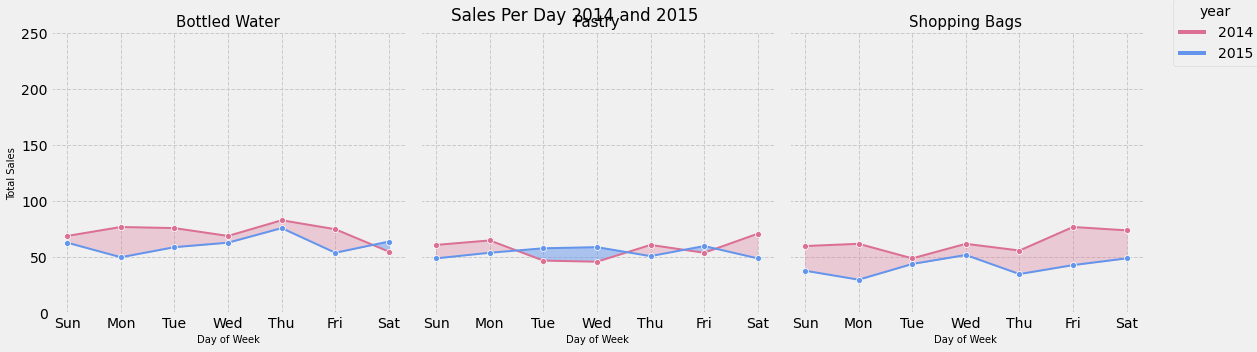

In [90]:
g = sns.relplot(data = top3_dec_rank,
           x = "day_of_week", 
           y = "sales", 
           hue = "year", 
           col = "item",
           col_wrap = 3,
           kind = "line",
           linewidth = 2,
           marker = "o",
           palette = ["palevioletred", "cornflowerblue"])

axes = g.axes.flatten()

#fill between for all axes 
axes[2].fill_between(y2014_2015_sbag.day_of_week, 
                     y2014_2015_sbag.sales_x, 
                     y2014_2015_sbag.sales_y, 
                     alpha = 0.3, 
                     color = "palevioletred")

axes[0].fill_between(y2014_2015_bottled.day_of_week, 
                     y2014_2015_bottled.sales_x, 
                     y2014_2015_bottled.sales_y, 
                     y2014_2015_bottled.sales_x > y2014_2015_bottled.sales_y,
                     interpolate = True, 
                     alpha = 0.3, 
                     color = "palevioletred")

axes[0].fill_between(y2014_2015_bottled.day_of_week, 
                     y2014_2015_bottled.sales_x, 
                     y2014_2015_bottled.sales_y, 
                     y2014_2015_bottled.sales_x < y2014_2015_bottled.sales_y,
                     interpolate = True, 
                     alpha = 0.5, 
                     color = "cornflowerblue")

axes[1].fill_between(y2014_2015_pastry.day_of_week, 
                     y2014_2015_pastry.sales_x, 
                     y2014_2015_pastry.sales_y, 
                     where = (y2014_2015_pastry.sales_x > y2014_2015_pastry.sales_y), 
                     interpolate = True, 
                     alpha = 0.3, 
                     color = "palevioletred")

axes[1].fill_between(y2014_2015_pastry.day_of_week, 
                     y2014_2015_pastry.sales_x, 
                     y2014_2015_pastry.sales_y, 
                     where = (y2014_2015_pastry.sales_x < y2014_2015_pastry.sales_y), 
                     interpolate = True, 
                     alpha = 0.5, 
                     color = "cornflowerblue")

axes[0].set_title("Bottled Water", size = 15)
axes[1].set_title("Pastry", size = 15)
axes[2].set_title("Shopping Bags", size = 15)

g.set_xlabels("Day of Week", size = 10)
g.set_ylabels("Total Sales", size = 10)

#rename axis label ticks as wed, thur etc.
#create list of label ticks and tick range 
day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
day_number = np.arange(0,7,1).tolist()

y_range = np.arange(0,300, 50).tolist()

#set grid style for all axes 
for i in range(3):
    axes[i].grid(ls='dashed')
    axes[i].set_xticks(ticks = day_number)
    axes[i].set_xticklabels(day)
    axes[i].set_yticks(y_range)

g.fig.suptitle('Sales Per Day 2014 and 2015')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## 5c. Further Analysis of 2015 Items with Increased Rank
### Top 3: Tropical Fruit, Citrus Fruit, Sausage
The sales will be filtered according to 3 items with increased rank and compared between 2014 to 2015, to **determine if there is any increasing or decreasing trend**.

In [91]:
top3_asc_item = ["sausage", "tropical fruit", "citrus fruit"]

#for sns relplot
top3_asc_rank = df_item_list.loc[df_item_list.item.isin(top3_asc_item)]

top3_asc_rank_14 = top3_asc_rank.loc[top3_asc_rank.year == 2014]
top3_asc_rank_15 = top3_asc_rank.loc[top3_asc_rank.year == 2015]

#for fill between plot
top3_asc_rank_all = pd.merge(top3_asc_rank_14, 
                             top3_asc_rank_15, 
                             how = "inner", 
                             left_on = ["item", "day_of_week"], 
                             right_on = ["item", "day_of_week"])

y2014_2015_tfruit = top3_asc_rank_all.loc[top3_asc_rank_all.item == "tropical fruit"]
y2014_2015_cfruit = top3_asc_rank_all.loc[top3_asc_rank_all.item == "citrus fruit"]
y2014_2015_saus = top3_asc_rank_all.loc[top3_asc_rank_all.item == "sausage"]

y2014_2015_saus.head()

,year_x,day_of_week,item,sales_x,year_y,sales_y
2,2014,0,sausage,31,2015,131
5,2014,1,sausage,17,2015,101
8,2014,2,sausage,21,2015,111
11,2014,3,sausage,29,2015,102
14,2014,4,sausage,25,2015,110


Summarised weekly findings:
1. **Tropical Fruit:**
    - Peaks near the end of the week, Wed - Fri 2015 
    - Diff lows for both years, Mon 2015, Fri 2014
    
    
2. **Citrus Fruit:**
    - Sales steady through the week, except for peak on Fri 2015
    - Diff peaks for both years, Wed 2014 and Fri 2015
    
    
3. **Sausage:**
    - Most increase from 2014 to 2015 
    - Sales are steady in 2014
    - Sales decrease through the week

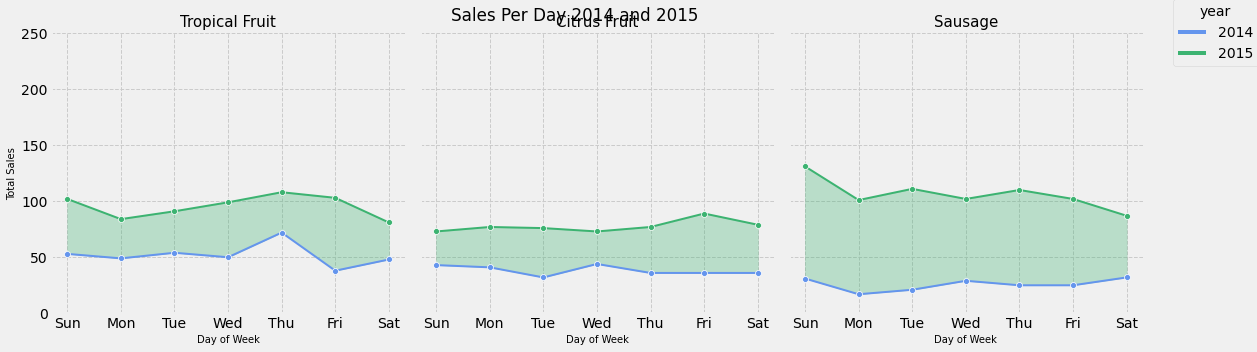

In [92]:
g = sns.relplot(data = top3_asc_rank,
           x = "day_of_week",
           y = "sales",
           hue = "year", 
           col = "item",
           col_wrap = 3, 
            linewidth = 2,
            kind = "line",
           marker = "o", 
           palette = ["cornflowerblue", "mediumseagreen"])

axes = g.axes.flatten()

#fill between for all axes 
axes[0].fill_between(y2014_2015_tfruit.day_of_week, 
                     y2014_2015_tfruit.sales_x, 
                     y2014_2015_tfruit.sales_y, 
                     alpha = 0.3, 
                     color = "mediumseagreen")
axes[1].fill_between(y2014_2015_cfruit.day_of_week, 
                     y2014_2015_cfruit.sales_x, 
                     y2014_2015_cfruit.sales_y, 
                     alpha = 0.3, 
                     color = "mediumseagreen")
axes[2].fill_between(y2014_2015_saus.day_of_week, 
                     y2014_2015_saus.sales_x, 
                     y2014_2015_saus.sales_y, 
                     alpha = 0.3, 
                     color = "mediumseagreen")

axes[0].set_title("Tropical Fruit", size = 15)
axes[1].set_title("Citrus Fruit", size = 15)
axes[2].set_title("Sausage", size = 15)

g.set_xlabels("Day of Week", size = 10)
g.set_ylabels("Total Sales", size = 10)

#rename axis label ticks as wed, thur etc.
#create list of label ticks and tick range 
day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
day_number = np.arange(0,7,1).tolist()

y_range = np.arange(0,300, 50).tolist()

#set grid style for all axes 
for i in range(3):
    axes[i].grid(ls='dashed')
    axes[i].set_xticks(ticks = day_number)
    axes[i].set_xticklabels(day)
    axes[i].set_yticks(y_range)

g.fig.suptitle('Sales Per Day 2014 and 2015')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## 6a. Market Basket Analysis
We will conduct market basket analysis using Apiori, to **identify associations between items** to **boost sales by understanding consumer dietary habits**. For example, two items that are most likely associated with each other can be placed near each other in the shopping aisle, or sold as bundles to incite more compulsive buying from consumers. 

There are four main concepts that is critical behind MBA:

1. **Support:**
    - How frequent an item set appears in the dataset?
    - Important to note that during the analysis, we will have to filter out items that does not appear frequently 
    - This is to reduce total number of itemsets and help us narrow down our analysis
    
    
2. **Confidence:** 
    - How often an itemset is found to be true?
    - e.g. how true are both items (sugar and flour) occuring in a transation together
    
    
3. **Lift:**
    - Indicates associations between item/ itemsets 
    - Higher lift indicates stronger associations 
    - A lift with value higher than 1 has generally strong association
    
    
4. **Conviction:**
    - How strongly consequent depends on antecedent 
    - e.g. High value means customer is highly likely to buy bread (consequent) if they buy milk (antecedent)
    - if a customer does not buy milk, they will not buy bread


In [93]:
df["id"] = df["id"].astype("int")

#unstack the dataframe into a dataframe that the apriori module is able to understand
basket = df.groupby(["id", "item"])["item"].count().unstack().fillna(0).reset_index()
basket.head()

item,id,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


Convert positive values to 1 and other values to 0, for analysis using apriori:

In [95]:
def encode_units(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1 
    
basket_encode = basket.applymap(encode_units)

#drop the member_names column, so it will not be part of the calculation 
basket_encode = basket_encode.drop("id", axis = 1)

Run through apriori to show items that are frequently bought together it is here that we have to set the min_support to filter out least occuring items. otherwise, there will be too many itemsets to handle 

In [96]:
frequent_items = apriori(basket_encode, min_support = 0.05, use_colnames = True).sort_values(by = 'support', ascending = False)
frequent_items.head(10)

,support,itemsets
55,0.458184,(whole milk)
37,0.376603,(other vegetables)
41,0.349666,(rolls/buns)
47,0.313494,(soda)
56,0.282966,(yogurt)
51,0.233710,(tropical fruit)
42,0.230631,(root vegetables)
5,0.213699,(bottled water)
44,0.206003,(sausage)
116,0.191380,"(other vegetables, whole milk)"


### Association rules 

set min lift threshold to be 1

In [97]:
asso_rules = association_rules(frequent_items, 
                               metric = "lift",
                               min_threshold = 1).sort_values("lift", ascending = False)
final_basket = asso_rules[["antecedents", "consequents", "support", "confidence", "lift", "conviction"]]
final_basket.head()

,antecedents,consequents,support,confidence,lift,conviction
183,(bottled water),"(other vegetables, whole milk)",0.056183,0.262905,1.373732,1.097036
182,"(other vegetables, whole milk)",(bottled water),0.056183,0.293566,1.373732,1.113056
184,(other vegetables),"(bottled water, whole milk)",0.056183,0.149183,1.327657,1.043273
181,"(bottled water, whole milk)",(other vegetables),0.056183,0.500000,1.327657,1.246793
88,(yogurt),"(other vegetables, whole milk)",0.071832,0.253853,1.326434,1.083727


We have several attributes in the dataframe. Lets look at the **potential relation amongst confidence, lift and conviction** through a scatterplot. This would give us an **overview and general sensing of how itemsets (antecedents and consequents) are spread out**. 

We can see that as **lift and confidence increases, the conviction increases** too. It seems that **confidence has a stronger postive r/s with conviction**. It is interesting to note that for **temsets with confidence higher than 0.3**, there is **a positive linear relationship between confidence and lift**. However, we are not sure what the itemsets are. Next step is to filter and look at these items. 

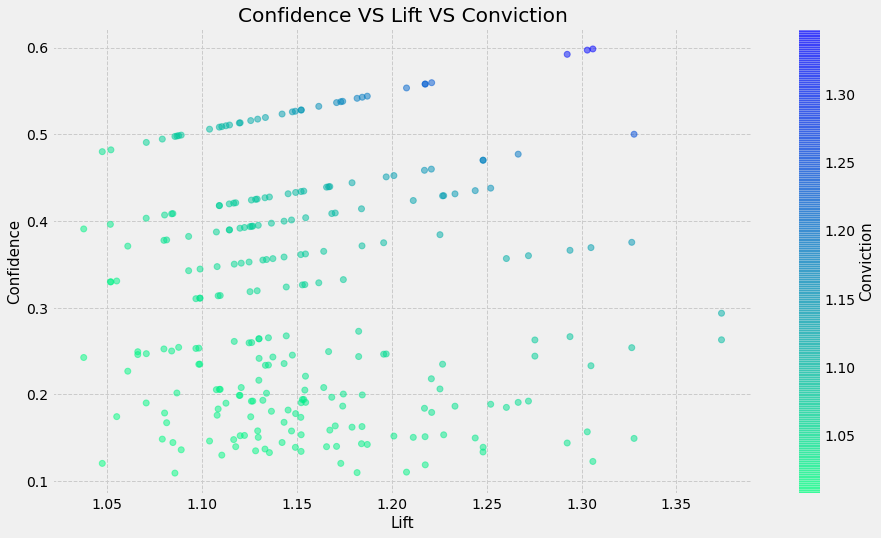

In [99]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (14,8))

color = final_basket.conviction.tolist()

plt.scatter(final_basket.lift, 
            final_basket.confidence,
            marker = "o", 
            linewidth = 1, 
            alpha = 0.5, 
            c = color, 
            cmap = "winter_r")

plt.grid(ls='dashed')

cbar = plt.colorbar()
cbar.set_label("Conviction", size = 15)

plt.xlabel("Lift", size = 15)
plt.ylabel("Confidence", size = 15)

plt.title("Confidence VS Lift VS Conviction")

plt.show()

We can see that it is those with itemsets having whole milk as consequents. It seems that if we group the datasets by same consequent items, we are able to see a positive liner relationship. Next step is to conduct a facetgrid plot to confirm our prediction. 

Filter itemsets with confidence greater than 0.5 and lift greater than 1.15

In [100]:
basket_filter = final_basket.loc[((final_basket.confidence > 0.5) & (final_basket.lift > 1.15))].sort_values("conviction", ascending = False)
basket_filter

,antecedents,consequents,support,confidence,lift,conviction
180,"(bottled water, other vegetables)",(whole milk),0.056183,0.598361,1.305941,1.349012
84,"(yogurt, other vegetables)",(whole milk),0.071832,0.597015,1.303003,1.344507
128,"(rolls/buns, yogurt)",(whole milk),0.065931,0.592166,1.292420,1.328521
54,"(rolls/buns, other vegetables)",(whole milk),0.082093,0.559441,1.220996,1.229837
202,"(yogurt, soda)",(whole milk),0.054387,0.557895,1.217622,1.225537
102,"(soda, other vegetables)",(whole milk),0.069266,0.557851,1.217528,1.225416
240,"(tropical fruit, other vegetables)",(whole milk),0.050539,0.553371,1.207749,1.213123
136,"(rolls/buns, soda)",(whole milk),0.065162,0.543897,1.187072,1.187926
38,(shopping bags),(whole milk),0.091329,0.542683,1.184422,1.184772
247,"(other vegetables, sausage)",(whole milk),0.050282,0.541436,1.181702,1.181551


## 6b. Further Analysing the Data

We need to convert frozen set into lists, add the coverted lists as columns to the end of the dataframe

In [101]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

final_basket.loc[:,"antecedent_list"] = [list(item) for item in final_basket["antecedents"]].copy()
final_basket.loc[:,"antecedent_list_1"] = [", ".join(item) for item in final_basket["antecedents"]].copy()

final_basket.loc[:,"consequent_list"] = [list(item) for item in final_basket["consequents"]].copy()
final_basket.loc[:,"consequent_list_1"] = [", ".join(item) for item in final_basket["consequent_list"]].copy()

final_basket.sort_values("conviction", ascending = False, inplace = True)
final_basket.head()

,antecedents,consequents,support,confidence,lift,conviction,antecedent_list,antecedent_list_1,consequent_list,consequent_list_1
180,"(bottled water, other vegetables)",(whole milk),0.056183,0.598361,1.305941,1.349012,"[bottled water, other vegetables]","bottled water, other vegetables",[whole milk],whole milk
84,"(yogurt, other vegetables)",(whole milk),0.071832,0.597015,1.303003,1.344507,"[yogurt, other vegetables]","yogurt, other vegetables",[whole milk],whole milk
128,"(rolls/buns, yogurt)",(whole milk),0.065931,0.592166,1.292420,1.328521,"[rolls/buns, yogurt]","rolls/buns, yogurt",[whole milk],whole milk
181,"(bottled water, whole milk)",(other vegetables),0.056183,0.500000,1.327657,1.246793,"[bottled water, whole milk]","bottled water, whole milk",[other vegetables],other vegetables
54,"(rolls/buns, other vegetables)",(whole milk),0.082093,0.559441,1.220996,1.229837,"[rolls/buns, other vegetables]","rolls/buns, other vegetables",[whole milk],whole milk


Our hypothesis is true: data grouped by consequent items has a positive linear relationship between confidence, lift and conviction. However, we can see that consequent items whole milk, other vegetables, rolls/buns yogurt and soda dominates the data set. If we were to **take items with only high conviction, the results will only be limited to itemsets with whole milk, other vegetables ans rolls/buns etc**.

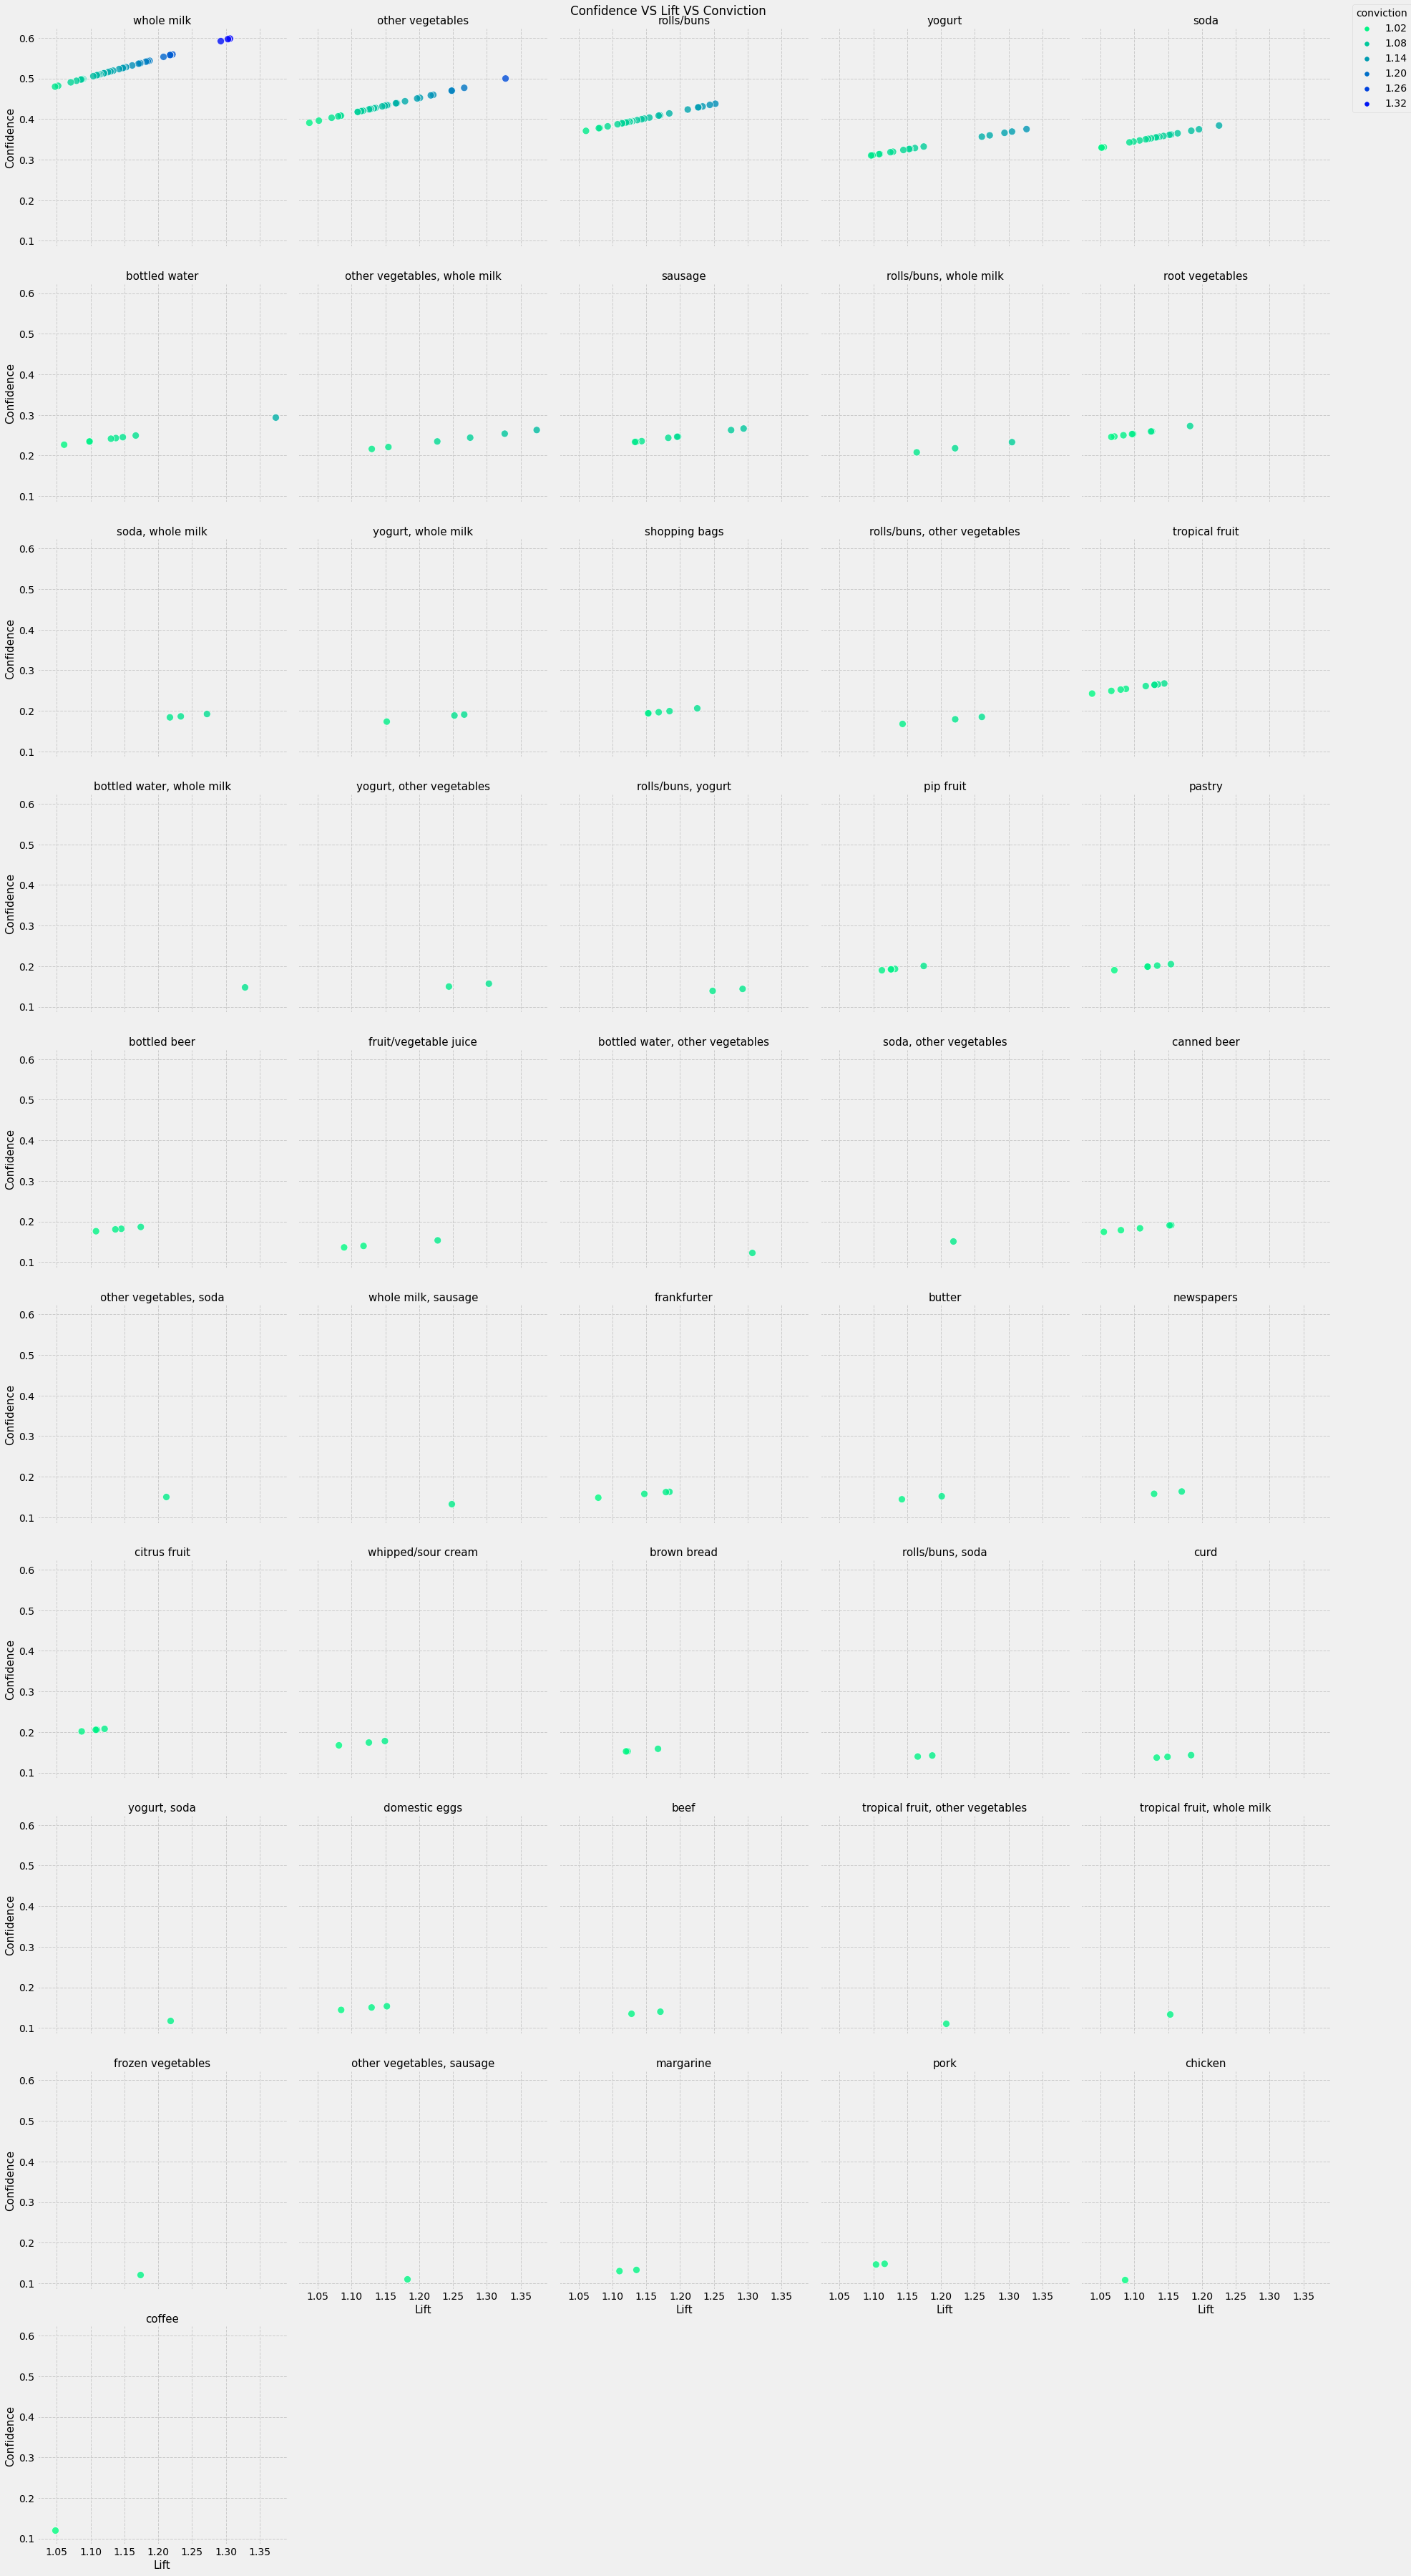

In [102]:
g = sns.relplot(data = final_basket, 
           x = "lift", y = "confidence", 
           col = "consequent_list_1", 
           col_wrap = 5, 
           hue = "conviction", 
           s = 100, 
           alpha = 0.8,
           palette = "winter_r")

axes = g.axes.flatten()

g.set_xlabels("Lift", size = 15)
g.set_ylabels("Confidence", size = 15)

title = final_basket["consequent_list_1"].unique().tolist()

#set grid style for all axes 
for i in range(len(title)):
    axes[i].grid(ls='dashed')
    axes[i].set_title(title[i], size = 15)

g.fig.suptitle('Confidence VS Lift VS Conviction', y = 1)

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## 6c. Putting it All Together
For our results be less skewed, we can take the following:

1. top 2 items of each consequent item category ordered by conviction, with conviction higher than 1.10.
2. top 1 items of each consequent item category ordered by conviction, with conviction lower than 1.10

Pick items with high conviction, as they will also have both high confidence and lift values 

In [103]:
df_conviction = final_basket[final_basket.conviction >= 1.10]
df_conviction = df_conviction.groupby("consequent_list_1").head(2)
df_conviction.reset_index(inplace = True, drop = True)
df_conviction = df_conviction[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]
df_conviction.sort_values("conviction", ascending = False)

,antecedents,consequents,support,confidence,lift,conviction
0,"(bottled water, other vegetables)",(whole milk),0.056183,0.598361,1.305941,1.349012
1,"(yogurt, other vegetables)",(whole milk),0.071832,0.597015,1.303003,1.344507
2,"(bottled water, whole milk)",(other vegetables),0.056183,0.500000,1.327657,1.246793
3,"(yogurt, whole milk)",(other vegetables),0.071832,0.477002,1.266589,1.191967
4,"(yogurt, whole milk)",(rolls/buns),0.065931,0.437819,1.252106,1.156805
5,"(yogurt, other vegetables)",(rolls/buns),0.052335,0.434968,1.243951,1.150968
6,"(other vegetables, whole milk)",(yogurt),0.071832,0.375335,1.326434,1.147870
7,"(rolls/buns, whole milk)",(yogurt),0.065931,0.369253,1.304939,1.136802
8,(shopping bags),(soda),0.064649,0.384146,1.225370,1.114722
9,"(other vegetables, whole milk)",(bottled water),0.056183,0.293566,1.373732,1.113056


There are 40 items after getting top 1 item grouped by consequents and orederd by conviction. To make results more readable we can group by antecedents.  

Pick 1st antecedent - consequent pair, order by conviction descending

In [104]:
df_first_item = final_basket.sort_values(["consequent_list_1", "conviction"], ascending = [True, False])
df_first_item = df_first_item.groupby("consequent_list_1").head(1)

df_first_item[["antecedents", "consequents", "support","confidence", "lift", "conviction"]].head(10)

,antecedents,consequents,support,confidence,lift,conviction
145,(whole milk),(beef),0.064135,0.139978,1.170886,1.023754
51,(whole milk),(bottled beer),0.085428,0.186450,1.174124,1.033988
182,"(other vegetables, whole milk)",(bottled water),0.056183,0.293566,1.373732,1.113056
185,(whole milk),"(bottled water, other vegetables)",0.056183,0.122620,1.305941,1.032741
184,(other vegetables),"(bottled water, whole milk)",0.056183,0.149183,1.327657,1.043273
159,(other vegetables),(brown bread),0.059774,0.158719,1.167336,1.027045
171,(other vegetables),(butter),0.057209,0.151907,1.201085,1.029988
122,(rolls/buns),(canned beer),0.066701,0.190756,1.154605,1.031564
257,(whole milk),(chicken),0.050026,0.109183,1.085698,1.009674
135,(soda),(citrus fruit),0.065162,0.207856,1.120640,1.028248


One itemset that stands out is soda and shopping bags. Soda antecedent's fist consequent item is shopping bag and vice versa. others are bottled water ==> whole milk, other vegetables.

In [105]:
#order by antecedent 
df_first_item = df_first_item.sort_values(["antecedent_list_1", "conviction"], ascending = [True, False])
df_first_item[["antecedents", "consequents", "support","confidence", "lift", "conviction"]]

,antecedents,consequents,support,confidence,lift,conviction
183,(bottled water),"(other vegetables, whole milk)",0.056183,0.262905,1.373732,1.097036
180,"(bottled water, other vegetables)",(whole milk),0.056183,0.598361,1.305941,1.349012
181,"(bottled water, whole milk)",(other vegetables),0.056183,0.500000,1.327657,1.246793
87,(other vegetables),"(yogurt, whole milk)",0.071832,0.190736,1.266589,1.049608
184,(other vegetables),"(bottled water, whole milk)",0.056183,0.149183,1.327657,1.043273
249,(other vegetables),"(whole milk, sausage)",0.050282,0.133515,1.248061,1.030626
171,(other vegetables),(butter),0.057209,0.151907,1.201085,1.029988
121,(other vegetables),(whipped/sour cream),0.066957,0.177793,1.149315,1.028093
159,(other vegetables),(brown bread),0.059774,0.158719,1.167336,1.027045
244,(other vegetables),"(tropical fruit, whole milk)",0.050539,0.134196,1.152195,1.020474


## 7. Comparing Total Sales Between Items 
### Soda and Shopping Bags Weekly Total Purchase
We have identified that these two items are strongly associated to each other. Lets confirm this by viewing weekly total purhcase via time series gaph. 

In [106]:
#group by year, day of week and count total sales 
df_soda_sb = df.groupby(["year", "day_of_week"])["item"].value_counts().reset_index(name = "sales")

#filter the two items
df_soda_sb = df_soda_sb.loc[df_soda_sb.item.isin(["soda", "shopping bags"])]
df_soda_sb.head()

,year,day_of_week,item,sales
3,2014,0,soda,112
8,2014,0,shopping bags,60
154,2014,1,soda,112
160,2014,1,shopping bags,62
310,2014,2,soda,108


We expected that for both years, the trends are similar, however this is not the case. It is surprising that in the **year 2014, the trends for both items are very different**. However, the trends are **more similar in 2015**, with an exception for mondays, where sales of shopping bag is the lowest. 

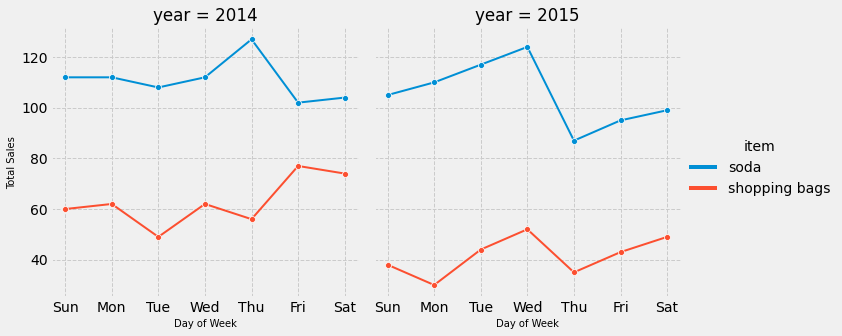

In [107]:
g = sns.relplot(data = df_soda_sb, 
           x = "day_of_week", y = "sales", 
           hue = "item", 
           col = "year", 
           col_wrap = 2,
           kind = "line", 
           marker = "o",
            linewidth = 2)

axes = g.axes.flatten()

g.set_xlabels("Day of Week", size = 10)
g.set_ylabels("Total Sales", size = 10)

#rename axis label ticks as wed, thur etc.
#create list of label ticks and tick range 
day = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
day_number = np.arange(0,7,1).tolist()

#set grid style for all axes 
for i in range(2):
    axes[i].grid(ls='dashed')
    axes[i].set_xticks(ticks = day_number)
    axes[i].set_xticklabels(day)


## 8. Final Summary

In summary, 2015 has higher total sales as compared to 2014. Total sales in 2015 peaked in September. This comes with the exception of Feb, where total sales in 2015 dipped below total sales in 2014. Total sales in 2015 peaked in September. Similary, total sales in July and Dec 2015 almost dipped below 2014. Both year also have varying peak and low periods and there does not seem to be a monthly trend 

This is similary for total weekly sales for both years. There does not seem to be an obvious trend, however, it is interesting to note that peak for 2015 (Wed) was the lowest day for 2014. 

Whole milk, other vegetables and roll/buns are consistent top 3 items for both years, with whole milk having most increase. Bottled water, pastry and shopping bags total sales have dropped, while tropical fruit, citrus fruit and sausages have increased, with sausages having the most increase. 

Bottled water, other vegetables --> milk has the highest conviction, followed by yogurt, other vegetables --> milk. However, this could be the case because they are the main staples of consumer's diet and has the highest frequency of appearing in consumer's transaction. 

However, all these should also be analysed together with how the items are arranged in the grocery store's layout. Itemsets with high association could be due to them being arranged side by side in the store. Additionally, we also need to take into account all the discounts/ events that the owner has carried out over the course of 2 years as this could potentially affect the total sales and influence trends.